**NOTE:** You probably will see warnings. These are not errors! However, you should read them and try to understand why they're there. Can you fix them?

![](http://rentinginla.com/wp-content/uploads/2015/12/Buying.jpg)
# [Project 2: Predicting House Prices with Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

The goal of this project is for you to use EDA, visualization, data cleaning, preprocesing, and linear models to predict home prices given the features of the home, and interpret your linear models to find out what features add value to a home! This project is a bit more open-ended than project 1. 

Be sure to ...

* Think about your choices when it comes to your choices about the data. Be ready to defend your decisions!
* Use lots of plots to dig deeper into the data! Describe the plots and convey what you learned from them.
* Don't forget to read the [description of the data](../data_description.txt) (also available at the kaggle website)! This has valuable information that will help you clean and impute data. `NaN` means something in many of the columns! Don't just drop or fill them!
* Try fitting many models! Document your work and note what you've tried.
* Apply what you've learned in class, books, videos, Kaggle forums, and blog posts. There have been a TON of blog posts about this;  you should seek them out and read them!


From the Kaggle competition website:

    Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

    With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.display import display

%matplotlib inline 
np.random.seed(42)

## 1. Load the Data 

* The data comes in three separate CSVs located in `../data/`. 
* Load the CSV into a `DataFrame`. 
* Make sure to check the `.head` or `.sample`. How many rows? How many columns?
* Familiarize yourself with the column names and what they represent.
* Is there a column that can be set as the `index`? If so, set that column as the index when loading the data. (`df.set_index()`)

In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.sample()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
892,893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500


In [5]:
df.shape[0]

1460

### Data has 81 columns and 1460 rows.

In [6]:
df.set_index('Id')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [7]:
import csv 
with open('../data/train.csv', 'r') as f:
    reader = csv.reader(f)
    my_list = list(reader)

**Bonus:** Write an assertion statement to programmatically verify the correct number of rows and columns were imported.

In [8]:
assert len(df.columns) == len(my_list[0])

In [9]:
assert df.shape[0] == len(my_list[1:])

### Correct number of rows and columns were imported.

## 2. Exploratory Data Analysis (EDA)

### A. Data Types

Read the data description on Kaggle. Which variables are numerical and categorical? Are there any columns that can be deleted? 

Make sure the `dtype` of each column is correct. 

**NOTE:** There is one column in particular that should be categorical but will load in pandas as numeric.

In [10]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


### MSSubClass contained categorical values. 

In [11]:
df['MSSubClass'] = df['MSSubClass'].astype('object')

In [12]:
df['MSSubClass']

0        60
1        20
2        60
3        70
4        60
5        50
6        20
7        60
8        50
9       190
10       20
11       60
12       20
13       20
14       20
15       45
16       20
17       90
18       20
19       20
20       60
21       45
22       20
23      120
24       20
25       20
26       20
27       20
28       20
29       30
       ... 
1430     60
1431    120
1432     30
1433     60
1434     20
1435     20
1436     20
1437     20
1438     20
1439     60
1440     70
1441    120
1442     60
1443     30
1444     20
1445     85
1446     20
1447     60
1448     50
1449    180
1450     90
1451     20
1452    180
1453     20
1454     20
1455     60
1456     20
1457     70
1458     20
1459     20
Name: MSSubClass, Length: 1460, dtype: object

### B. Plot histograms of the numeric columns. 

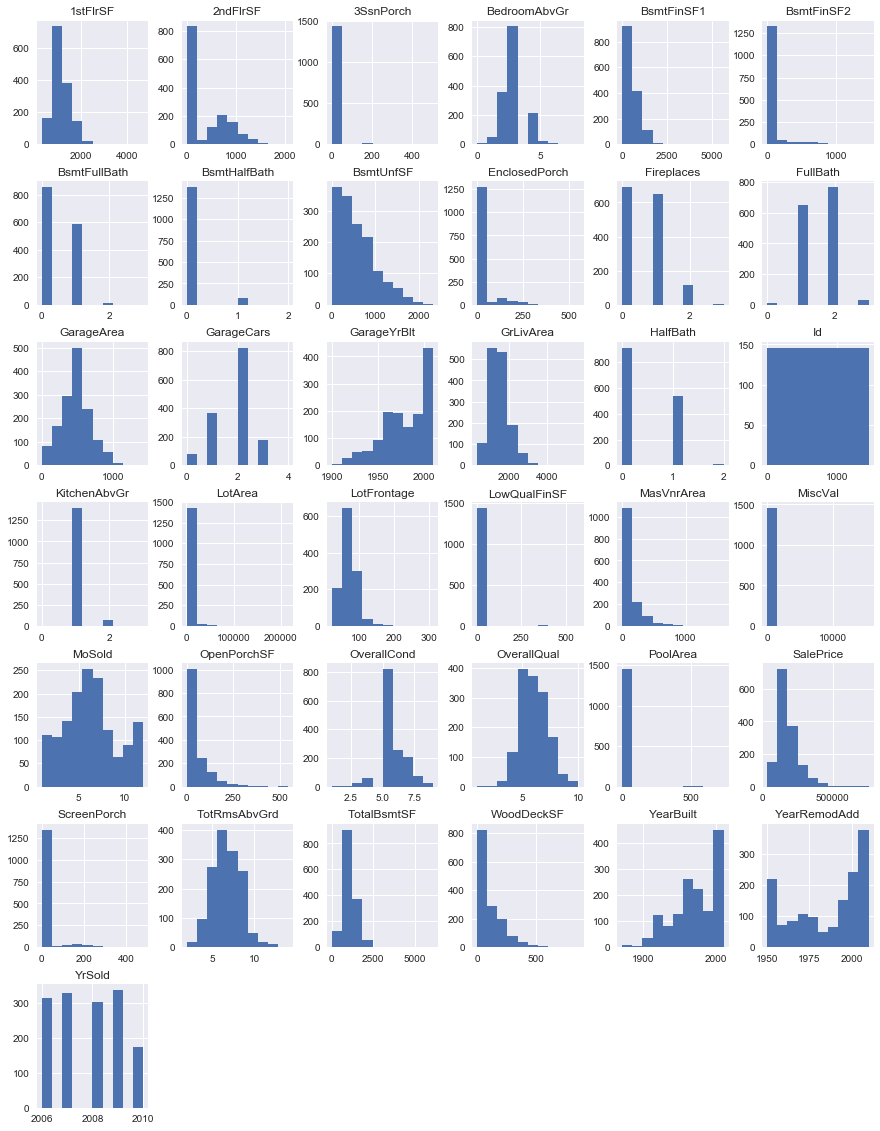

In [13]:
df.hist(figsize =(15,20))
plt.show()

#### What are your observations? Add them to this markdown cell.

---
More houses are being built recently then in the 1975's.

More houses have 5-7 rooms above ground.

Most houses do not have wood deck.


### C. Plot the Numeric Columns Against `SalePrice` using scatter plots.

In [14]:
numeric_columns = df.select_dtypes(exclude = ['object']).columns
numeric_columns

Index([u'Id', u'LotFrontage', u'LotArea', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'MasVnrArea', u'BsmtFinSF1',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF', u'2ndFlrSF',
       u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath',
       u'FullBath', u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr',
       u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt', u'GarageCars',
       u'GarageArea', u'WoodDeckSF', u'OpenPorchSF', u'EnclosedPorch',
       u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal', u'MoSold',
       u'YrSold', u'SalePrice'],
      dtype='object')

In [15]:
len(numeric_columns)

37

In [16]:
categorical_columns = df.select_dtypes(['object']).columns
categorical_columns

Index([u'MSSubClass', u'MSZoning', u'Street', u'Alley', u'LotShape',
       u'LandContour', u'Utilities', u'LotConfig', u'LandSlope',
       u'Neighborhood', u'Condition1', u'Condition2', u'BldgType',
       u'HouseStyle', u'RoofStyle', u'RoofMatl', u'Exterior1st',
       u'Exterior2nd', u'MasVnrType', u'ExterQual', u'ExterCond',
       u'Foundation', u'BsmtQual', u'BsmtCond', u'BsmtExposure',
       u'BsmtFinType1', u'BsmtFinType2', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'KitchenQual', u'Functional',
       u'FireplaceQu', u'GarageType', u'GarageFinish', u'GarageQual',
       u'GarageCond', u'PavedDrive', u'PoolQC', u'Fence', u'MiscFeature',
       u'SaleType', u'SaleCondition'],
      dtype='object')

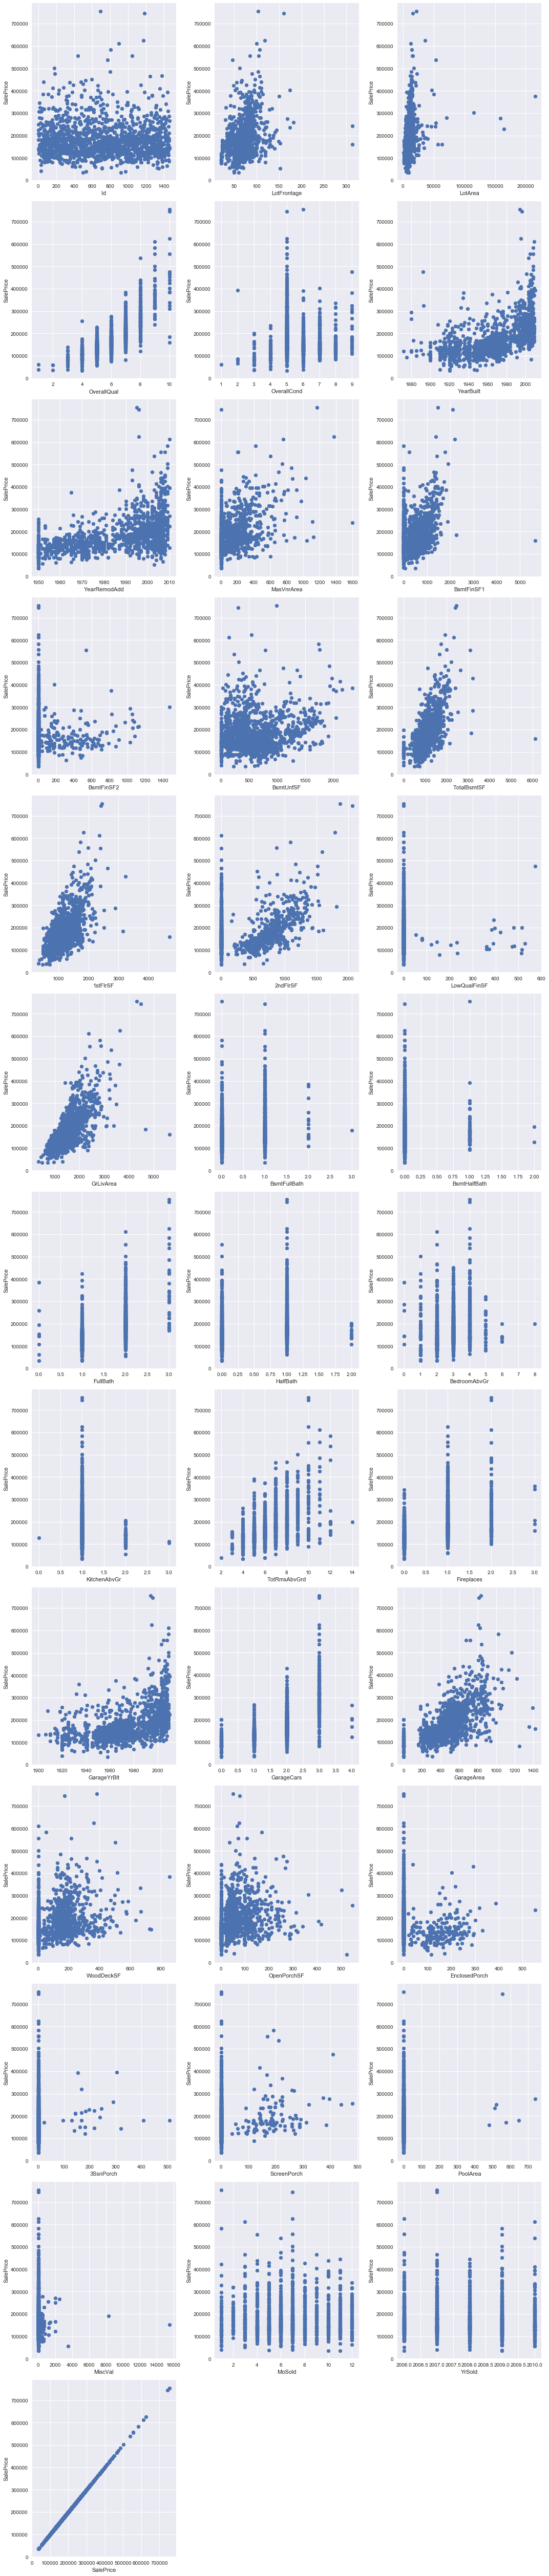

In [17]:
fig = plt.figure(figsize=(15,70))
for i, col in enumerate(numeric_columns):
    fig.add_subplot(13,3,1+i)
    plt.scatter(df[col], df['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    fig.tight_layout()

## What are your observations? Add them to this markdown cell.

---
Some parameters show notable correlation, while others, when considered alone, do not seem to show enough correlation.  

LotFrontage, TotalBsmntSF, 1stFlrSF, etc. show correlation with the saleprice.

TotRmsAbvGrnd show some correlation. 

Others, such as YrSold, do not show correlation. 





### D. Use bar plots to plot categorical features against `SalePrice`. 

**HINT:** Look up how to create bar plots in `matplotlib`. You will have to transform the data before you can create a bar plot! Also, look up [how to plot error bars](https://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-with-error-bars) so you can also observe the variability in your data!

In [18]:
len(categorical_columns)

44

In [19]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


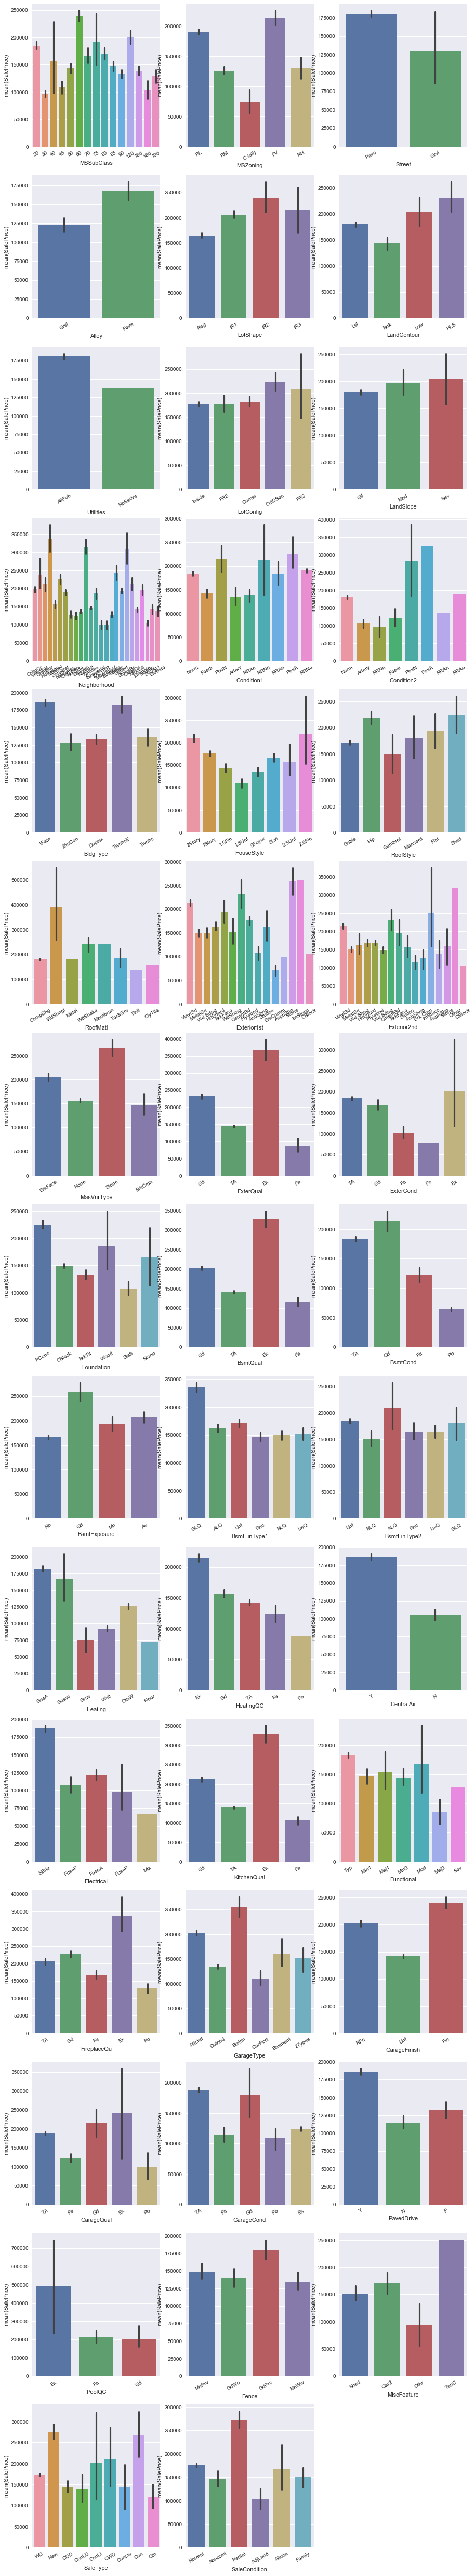

In [20]:
fig = plt.figure(figsize = (15, 90)) 
for i, col in enumerate(categorical_columns):
    fig.add_subplot(15, 3, i+1)
    ax = sns.barplot(x=col, y="SalePrice",data=df)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
   

#### What are your observations? Add them to this markdown cell.

---
Having certain features tend to demand higher price. 

New homes(Partial - SaleCondition), homes with standard circuit breakers, good basement conditions sell for more.




## 3. Preprocessing

### A. Identify and Remove Outliers for `SalePrice`

Make sure to... 
* Plot a histogram of the housing price. 
* Supply a definition of what an outlier is by your criteria. Does Tukey's method make sense with 1.5 times the interquartile range, or should that range be increased or decreased?
* Use masking to remove the outliers as you've defined them.

In [21]:
Q1 = np.percentile(df.SalePrice, 25)
Q3 = np.percentile(df.SalePrice, 75)
upper = df.SalePrice.mean()+2*(Q3-Q1)
lower = df.SalePrice.mean()-2*(Q3-Q1)

tukey_window = 2*(Q3-Q1)
less_than_Q1 = df.SalePrice < Q1 - tukey_window
greater_than_Q3 = df.SalePrice > Q3 + tukey_window
tukey_mask = (less_than_Q1 | greater_than_Q3)

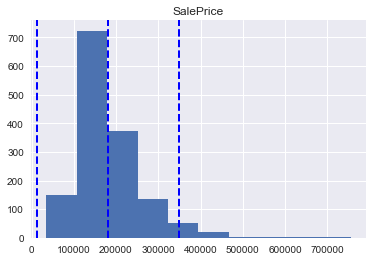

In [22]:
df.hist(column='SalePrice')
plt.axvline(df.SalePrice.mean(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(lower, color='b', linestyle='dashed', linewidth=2)
plt.axvline(upper, color='b', linestyle='dashed', linewidth=2)


In [23]:
len(df['SalePrice'])

1460

In [24]:
df_2 = df[~tukey_mask]

In [25]:
len(df_2)

1422

### B. Fill missing data!

* How many null values are in each column? Make a bar plot showing this only for columns with missing data.
* For each column with nulls, do nulls represent anything? Read the data description.
  * Some columns that are appearing as _null_ might legitimately be known (ie: "na").  Double check the [data description](../data_description.txt) for proper value representation.  A feature might actually be better represented by "not available" or "na" rather than `NULL` or `NaN`.  There's a difference between `NULL` (unknown), and "NA" (not available).  It might mean the difference between "there isn't a garage" and "there is no garage data". 
* Fill null values for each column by imputation. Here are some common methods for imputation:
  1. Using domain knowledge to select an appropriate value.
  1. Value from a randomly selected row.
  2. Mean, median, or mode value of the series.
  3. Value estimated by a predictive model.
* Make sure to justify your method for filling null values.
  

In [26]:
nulls = df_2.isnull().sum()

In [27]:
nl = nulls[nulls!=0]

In [28]:
nl.index

Index([u'LotFrontage', u'Alley', u'MasVnrType', u'MasVnrArea', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2',
       u'Electrical', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish', u'GarageQual', u'GarageCond', u'PoolQC', u'Fence',
       u'MiscFeature'],
      dtype='object')

MasVnrArea, GarageYrBlt are Objects

In [29]:
nl_df = pd.DataFrame({'columns':nl.index, 'null_count':nl.values})

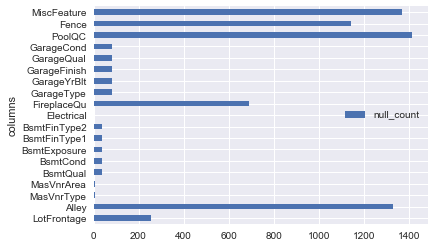

In [30]:
nl_df.plot(x = 'columns', y='null_count', kind = 'barh')
plt.show()

#### Replacing NaN with inferred values

Garage is probably built in the year the house was built.

Similarly, total Basement Square Footage should be close to the 1st Floor square footage, so replacing NaNs with 1stFlrSF.

In [31]:
df_2.GarageYrBlt.fillna(df_2.YearBuilt, inplace=True)

/Users/prescott/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [32]:
df_2['GarageYrBlt'].isnull().sum()

0

In [33]:
df_2.TotalBsmtSF.fillna(df_2['1stFlrSF'], inplace=True)

In [34]:
df_2['TotalBsmtSF'].isnull().sum()

0

Verify that you have *truly* eliminated all the null values!

#### For columns with fewer NaN values, eliminate NaN values by replacing with most dominent values in each column

In [35]:
df_2.GarageCond.fillna(df_2['GarageCond'].value_counts().idxmax(), inplace=True)
df_2.GarageQual.fillna(df_2['GarageQual'].value_counts().idxmax(), inplace=True)
df_2.GarageFinish.fillna(df_2['GarageFinish'].value_counts().idxmax(), inplace=True)
df_2.GarageType.fillna(df_2['GarageType'].value_counts().idxmax(), inplace=True)
df_2.BsmtFinType1.fillna(df_2['BsmtFinType1'].value_counts().idxmax(), inplace=True)
df_2.BsmtFinType2.fillna(df_2['BsmtFinType2'].value_counts().idxmax(), inplace=True)
df_2.BsmtExposure.fillna(df_2['BsmtExposure'].value_counts().idxmax(), inplace=True)
df_2.BsmtCond.fillna(df_2['BsmtCond'].value_counts().idxmax(), inplace=True)
df_2.BsmtQual.fillna(df_2['BsmtQual'].value_counts().idxmax(), inplace=True)
df_2.MasVnrArea.fillna(df_2['MasVnrArea'].value_counts().idxmax(), inplace=True)
df_2.MasVnrType.fillna(df_2['MasVnrType'].value_counts().idxmax(), inplace=True)
df_2.Electrical.fillna(df_2['Electrical'].value_counts().idxmax(), inplace=True)

#### Eliminate NaN for LotFrontage; check whether its correlated to LotArea using EDA

In [36]:
df_2['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7         NaN
8        51.0
9        50.0
10       70.0
11       85.0
12        NaN
13       91.0
14        NaN
15       51.0
16        NaN
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24        NaN
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
        ...  
1429      NaN
1430     60.0
1431      NaN
1432     60.0
1433     93.0
1434     80.0
1435     80.0
1436     60.0
1438     90.0
1439     80.0
1440     79.0
1441      NaN
1442     85.0
1443      NaN
1444     63.0
1445     70.0
1446      NaN
1447     80.0
1448     70.0
1449     21.0
1450     60.0
1451     78.0
1452     35.0
1453     90.0
1454     62.0
1455     62.0
1456     85.0
1457     66.0
1458     68.0
1459     75.0
Name: LotFrontage, Length: 1422, dtype: float64

In [37]:
X_1 = np.sqrt(df_2.LotArea)
y_1 = df_2['LotFrontage']

In [38]:
LoDf = pd.DataFrame(X_1, y_1)

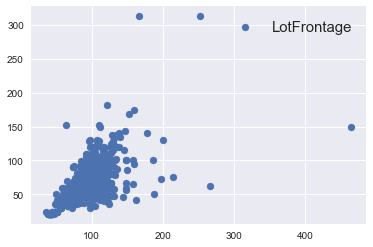

In [39]:
plt.scatter(X_1, y_1)
plt.legend(fontsize=15)
plt.show()

#### Correlation exists between sqrt of Lotfrontage and LotArea, so eliminate NaNs in LotFrontage using Sqrt of LotArea

In [40]:
df_2.LotFrontage.fillna(np.sqrt(df_2.LotArea), inplace=True)

In [41]:
df_2['LotFrontage'].isnull().sum()

0

#### Some columns have N/A, or Na, recognised as NaN's. 

#### Remove such NaN's with categorical 'NotAvail'

In [42]:
df_2.Alley.fillna('NotAvail', inplace=True)
df_2.PoolQC.fillna('NotAvail', inplace=True)
df_2.Fence.fillna('NotAvail', inplace=True)
df_2.FireplaceQu.fillna('NotAvail', inplace=True)
df_2.MiscFeature.fillna('NotAvail', inplace=True)

#### Confirm all NaN removed

In [43]:
df_2.isnull().values.any()

False

### C. Create dummy variables for categorical columns

Use `pd.get_dummies()` to turn your categorical features into numeric features. Make sure there are **no null values** in your dataset before you do this!

In [44]:
df_2_dummies = pd.get_dummies(df_2)

In [45]:
df_2_dummies.sample(2)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
528,529,58.0,9098,4,7,1920,2002,0.0,348,0,...,0,0,0,1,0,0,0,0,1,0
1195,1196,51.0,8029,6,5,2005,2005,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [46]:
df_2_dummies.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


### D. Split your data into a train and test set.

* Use `train_test_split` to hold out a test set. 
* Why do we hold out a test set?

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(df_2_dummies.drop('SalePrice', axis =1),
                                                    df_2['SalePrice'],
                                                    test_size = .1,
                                                    random_state = seed)

We hold out a test set because we need to understand how our model performs on data it hasn't seen. We may create a model that fits our training data very well but does not score well on the test set, suggesting that it won't predict well given new data. With a test set, we can understand how our model performs on unseen data.

In [49]:
for dataset in [X_train, X_test, y_train, y_test]:
    print(dataset.shape)

(1279, 308)
(143, 308)
(1279,)
(143,)


### E. Scale the data

Make sure to...
* instantiate a `StandardScaler` object
* `fit` the scaler on your training data
* `transform` both your training and test data.

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Modeling

Now that you've completed your EDA, you can now use your training data to build a model to predict home price from your features! As far as regression methods, you've learned a few, including ordinary least squares (a.k.a. `LinearRegression`), `Lasso`, `Ridge`, and `ElasticNet`. 

### A. Benchmarking

As we get started with modeling we should have some basis for comparison to get a sense of what a "good" model is for this task. 

For this task, as we will be focusing on linear models, we will use the most naive of the linear models, the Linear Regression as our benchmark. 

In [52]:
from sklearn.linear_model import LinearRegression

#### Results Dictionary

Make a results `list` to hold your results. After each model fit and score, you will add a dictionary of your results to this list using `.append()`. This will give you a list of dictionaries ... perfect for a DataFrame!

This is the pattern you will be using:

example_results = list()
result_1 = {'name':'test1','dataset' : 'train','preprocessing': 'raw','score': '1 bajillion'}
example_results.append(result_1)
result_2 = {'name':'test1','dataset' : 'train','preprocessing': 'scaled','score': '20 bajillion'}
example_results.append(result_2)

Then we pass the results list to pass to a DataFrame.

pd.DataFrame(example_results)

This gives us a convenient tool for manipulating our results and tracking our work ... our old friend, Pandas!

#### Make a new results list.

In [53]:
results = list()

#### Raw Benchmark

Instantiate a new `LinearRegression` model and save it as `benchmark_raw`.

In [54]:
benchmark_raw = LinearRegression()

- Fit the `benchmark_raw` model against the raw training data. 
- Score the `benchmark_raw` model against both the raw training set and the raw testing set. 
- Apprend a results dictionary to the `results` list. 

You could do this by

    results.append({'name':'benchmark',
                    'model': benchmark_raw,
                    'dataset' : 'train',
                    'preprocessing': 'raw',
                    'score': raw_train_score})
                    
Of course you can store a model in a dictionary!                    

In [55]:
benchmark_raw.fit(X_train, y_train)
raw_train_score = benchmark_raw.score(X_train, y_train)
raw_test_score = benchmark_raw.score(X_test, y_test)

results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

#### Scaled Benchmark

- Fit the `benchmark_scaled` model against the scaled training data. 
- Score the `benchmark_scaled` model against both the scaled training set and the scaled testing set. 
- Write the results to the results `list`. 

In [56]:
benchmark_scaled = LinearRegression()

In [57]:
benchmark_scaled.fit(X_train_scaled, y_train)
scaled_train_score = benchmark_raw.score(X_train_scaled, y_train)
scaled_test_score = benchmark_raw.score(X_test_scaled, y_test)

results.append({'name':'benchmark',
                'model':benchmark_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
results.append({'name':'benchmark',
                'model':benchmark_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})

Use a DataFrame to display your results.

In [58]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.944779
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.878529
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-145.878091
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-74.838264


#### What are your observations? Add them to this markdown cell.

---
For benchmark raw data, the training model shows a very high score of .94.

When tested, the model performs to return a score of .88.

However, when the model is applied to the scaled data, the numbers for the scores are very much off.  While it is not clear what is causing such extreme scores, I suspect the high score shown for the benchmark model on the training dataset may indicate overfitting.

### B. Naive Regularization

Next, prepare a series of fits using the three regularized linear regression models with their default settings.

Perform each of these against both the raw and the scaled data. In this section, you should be fitting six models.

- A naive Ridge Regression against the raw data
- A naive Lasso Regression against the raw data
- A naive ElasticNet Regression against the raw data
- A naive Ridge Regression against the scaled data
- A naive Lasso Regression against the scaled data
- A naive ElasticNet Regression against the scaled data

**NOTE:** By "naive" we mean using all of the default settings.

In [59]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [60]:
ridge_raw = Ridge()
ridge_raw.fit(X_train, y_train)
ridgeraw_train_score = ridge_raw.score(X_train, y_train)
ridgeraw_test_score = ridge_raw.score(X_test, y_test)

results.append({'name':'ridge',
                'model':ridge_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': ridgeraw_train_score})
results.append({'name':'ridge',
                'model':ridge_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': ridgeraw_test_score})


In [61]:
ridge_scaled = Ridge()
ridge_scaled.fit(X_train_scaled, y_train)
ridgescale_train_score = ridge_scaled.score(X_train_scaled, y_train)
ridgescale_test_score = ridge_scaled.score(X_test_scaled, y_test)

results.append({'name':'ridge',
                'model':ridge_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': ridgescale_train_score})
results.append({'name':'ridge',
                'model':ridge_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': ridgescale_test_score})

In [62]:
lasso_raw = Lasso()
lasso_raw.fit(X_train, y_train)
lassoraw_train_score = lasso_raw.score(X_train, y_train)
lassoraw_test_score = lasso_raw.score(X_test, y_test)

results.append({'name':'Lasso',
                'model':lasso_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': lassoraw_train_score})
results.append({'name':'Lasso',
                'model':lasso_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': lassoraw_test_score})

/Users/prescott/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [63]:
lasso_scaled = Lasso()
lasso_scaled.fit(X_train_scaled, y_train)
lassoscale_train_score = lasso_scaled.score(X_train_scaled, y_train)
lassoscale_test_score = lasso_scaled.score(X_test_scaled, y_test)

results.append({'name':'Lasso',
                'model':lasso_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': lassoscale_train_score})
results.append({'name':'Lasso',
                'model':lasso_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': lassoscale_test_score})

In [64]:
enet_raw = ElasticNet()
enet_raw.fit(X_train, y_train)

enetraw_train_score = enet_raw.score(X_train, y_train)
enetraw_test_score = enet_raw.score(X_test, y_test)

results.append({'name':'Enet',
                'model':enet_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': enetraw_train_score})
results.append({'name':'Enet',
                'model':enet_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': enetraw_test_score})

In [65]:
enet_scaled = ElasticNet()
enet_scaled.fit(X_train_scaled, y_train)

enetscale_train_score = enet_scaled.score(X_train_scaled, y_train)
enetscale_test_score = enet_scaled.score(X_test_scaled, y_test)

results.append({'name':'Enet',
                'model':enet_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': enetscale_train_score})
results.append({'name':'Enet',
                'model':enet_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': enetscale_test_score})


Note that we see warnings here. As we are in an exploration phase with our model, this is acceptable.

Use a DataFrame to store your `results` as `results_df`. By this we mean, save the `results` list into a new dataframe so that you can manipulate the DataFrame.

In [66]:
results_df = pd.DataFrame(results)
results_df

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.944779
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.878529
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-145.878091
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-74.838264
4,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.928801
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.867434
6,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,0.944776
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,0.900086
8,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,0.944738
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,0.907014


#### Display just the raw test results using pandas

You can do this using pandas indexing as follows

    results_df[(results_df.preprocessing == 'raw') & 
               (results_df.dataset == 'test')]

In [67]:
results_df[(results_df.preprocessing == 'raw') & 
           (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.878529
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.867434
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,0.907014
13,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",Enet,raw,0.875533


#### What are your observations? Add them to this markdown cell.

---
### All the regularized models outperformed the benchmark model.  Notably, Lasso performed and returned the highest score.


#### Display just the scaled test results

In [68]:
results_df[(results_df.preprocessing == 'scaled') & 
           (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-74.838264
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,0.900086
11,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,scaled,0.902032
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",Enet,scaled,0.887864


#### What are your observations? Add them to this markdown cell.

---
### Results were shown to be consistent with the raw dataset.  Lasso still performed better, although Ridge model seemed to improve using scaled. 


These are your benchmark results. You will refer to these for analysis during the next phase.

#### Display just the Benchmark models

In [69]:
results_df[results_df.name == 'benchmark']

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.944779
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.878529
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-145.878091
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-74.838264


#### Display just the Ridge models

In [70]:
results_df[results_df.name == 'ridge']

,dataset,model,name,preprocessing,score
4,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.928801
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.867434
6,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,0.944776
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,0.900086


#### Display just the Lasso models

In [71]:
results_df[results_df.name == 'Lasso']

,dataset,model,name,preprocessing,score
8,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,0.944738
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,0.907014
10,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,scaled,0.944778
11,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,scaled,0.902032


#### Display just the Elasticnet models

In [72]:
results_df[results_df.name == 'Enet']

,dataset,model,name,preprocessing,score
12,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",Enet,raw,0.836005
13,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",Enet,raw,0.875533
14,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",Enet,scaled,0.916523
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",Enet,scaled,0.887864


#### What are your observations? Add them to this markdown cell.

---
### Lasso returns the same score for both the raw and scaled datasets.  Ridge and Enet returned improved scores for the scaled datasets.


### C. Cross-validated models

Import the Cross-Validation Models for each of the Regularized Linear Models

In [73]:
cv_results = list()

In [74]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

Perform the cross-validation using an `np.logspace(-2,4,7)`.

In [75]:
alphas = np.logspace(-2, 4, 7)

In [76]:
ridge_raw_cv = RidgeCV(alphas = alphas, cv=5)
ridge_raw_cv.fit(X_train, y_train)
ridgeraw_train_score = ridge_raw_cv.score(X_train, y_train)
ridgeraw_test_score = ridge_raw_cv.score(X_test, y_test)

cv_results.append({'name':'ridge',
                'model':ridge_raw_cv,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': ridgeraw_train_score})
cv_results.append({'name':'ridge',
                'model':ridge_raw_cv,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': ridgeraw_test_score})

In [77]:
ridge_scaled_cv = RidgeCV(alphas = alphas, cv=5)
ridge_scaled_cv.fit(X_train_scaled, y_train)
ridgescale_train_score = ridge_scaled_cv.score(X_train_scaled, y_train)
ridgescale_test_score = ridge_scaled_cv.score(X_test_scaled, y_test)

cv_results.append({'name':'ridge',
                'model':ridge_scaled_cv,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': ridgescale_train_score})
cv_results.append({'name':'ridge',
                'model':ridge_scaled_cv,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': ridgescale_test_score})

In [78]:
lasso_raw_cv = LassoCV(alphas=alphas, cv=5)
lasso_raw_cv.fit(X_train, y_train)
lassoraw_train_score = lasso_raw_cv.score(X_train, y_train)
lassoraw_test_score = lasso_raw_cv.score(X_test, y_test)

cv_results.append({'name':'Lasso',
                'model':lasso_raw_cv,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': lassoraw_train_score})
cv_results.append({'name':'Lasso',
                'model':lasso_raw_cv,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': lassoraw_test_score})

In [79]:
lasso_scaled_cv = LassoCV(alphas = alphas, cv=5)
lasso_scaled_cv.fit(X_train_scaled, y_train)
lassoscale_train_score = lasso_scaled_cv.score(X_train_scaled, y_train)
lassoscale_test_score = lasso_scaled_cv.score(X_test_scaled, y_test)

cv_results.append({'name':'Lasso',
                'model':lasso_scaled_cv,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': lassoscale_train_score})
cv_results.append({'name':'Lasso',
                'model':lasso_scaled_cv,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': lassoscale_test_score})

In [80]:
enet_raw_cv = ElasticNetCV(alphas = alphas, cv=5)
enet_raw_cv.fit(X_train, y_train)

enetraw_train_score = enet_raw_cv.score(X_train, y_train)
enetraw_test_score = enet_raw_cv.score(X_test, y_test)

cv_results.append({'name':'Enet',
                'model':enet_raw_cv,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': enetraw_train_score})
cv_results.append({'name':'Enet',
                'model':enet_raw_cv,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': enetraw_test_score})

In [81]:
enet_scaled_cv = ElasticNetCV(alphas = alphas, cv=5)
enet_scaled_cv.fit(X_train_scaled, y_train)

enetscale_train_score = enet_scaled_cv.score(X_train_scaled, y_train)
enetscale_test_score = enet_scaled_cv.score(X_test_scaled, y_test)

cv_results.append({'name':'Enet',
                'model':enet_scaled_cv,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': enetscale_train_score})
cv_results.append({'name':'Enet',
                'model':enet_scaled_cv,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': enetscale_test_score})


#### Display just the raw test results

In [82]:
cv_results_df = pd.DataFrame(cv_results)
cv_results_df

,dataset,model,name,preprocessing,score
0,train,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,raw,0.906459
1,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,raw,0.884088
2,train,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,scaled,0.904387
3,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,scaled,0.880030
4,train,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",Lasso,raw,0.918917
5,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",Lasso,raw,0.916963
6,train,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",Lasso,scaled,0.922078
7,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",Lasso,scaled,0.928380
8,train,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",Enet,raw,0.910554
9,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",Enet,raw,0.880132


In [83]:
cv_results_df[(cv_results_df.preprocessing == 'raw') & 
           (cv_results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
1,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,raw,0.884088
5,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",Lasso,raw,0.916963
9,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",Enet,raw,0.880132


#### Display just the scaled test results

In [84]:
cv_results_df[(cv_results_df.preprocessing == 'scaled') & 
           (cv_results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
3,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,scaled,0.880030
7,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",Lasso,scaled,0.928380
11,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",Enet,scaled,0.887864


### D. Model Selection

Interpret Regression Metrics for each of your models. Choose one of the following:

* R2
* MSE / RMSE
* MAE

What are your top 3 performing models? 

In [85]:
ridge_test_preds = ridge_scaled.predict(X_test_scaled)
lasso_test_preds = lasso_scaled.predict(X_test_scaled)
enet_test_preds = enet_scaled.predict(X_test_scaled)
ridge_test_preds_cv = ridge_scaled_cv.predict(X_test_scaled)
lasso_test_preds_cv = lasso_scaled_cv.predict(X_test_scaled)
enet_test_preds_cv = enet_scaled_cv.predict(X_test_scaled)

In [86]:
from sklearn.metrics import mean_absolute_error

In [87]:
print('Ridge MAE:', mean_absolute_error(ridge_test_preds, y_test))
print('Lasso MAE:', mean_absolute_error(lasso_test_preds, y_test))
print('Enet MAE:', mean_absolute_error(enet_test_preds, y_test))
print('Ridge MAE CV:', mean_absolute_error(ridge_test_preds_cv, y_test))
print('Lasso MAE CV:', mean_absolute_error(lasso_test_preds_cv, y_test))
print('Enet MAE CV:', mean_absolute_error(enet_test_preds_cv, y_test))


('Ridge MAE:', 12832.504580705912)
('Lasso MAE:', 12828.960967264429)
('Enet MAE:', 13835.115356125129)
('Ridge MAE CV:', 14290.396186300834)
('Lasso MAE CV:', 11457.288128894124)
('Enet MAE CV:', 13835.115356125129)


### Lasso CV and Lasso performed the best, followed by Ridge model.

## Explain the bias / variance tradeoff

Why do regularized models perform better on your test set?

#### Here, the benchmark model showed a high score that seemed to work on raw data.  But the benchmark may have overfitted and did not perform on the scaled dataset. 
#### Low variance may have concentrated the model on a limited set of data containing significant biases.  The training data may have been biased towards certain portions of the dataset, but such portions may have i) higher concentration of poor predictor variables correlating to the SalePrice, and/or ii) failed to capture significant predictor variables correlating to the SalePrice.  This may result in a model that does not perform on scaled datasets.
#### In contrast, regularized models limit overfitting, which may explain more consistent results in scaled datasets with not-so-significant difference in model performance score.

### Interpreting coefficients

For your best model, 

* plot relevant coefficients using the `plot_coef` functoin.


In [88]:
def plot_coef(model, top_n = 10):
    '''
    Plots the magnitude of top and bottom n coefficients
    '''
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1)

#### Plot your coefficients.

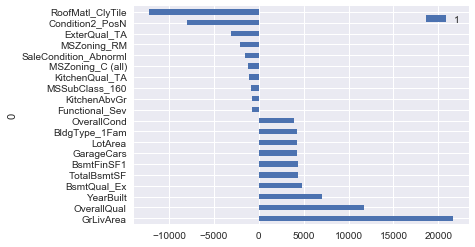

In [89]:
plot_coef(lasso_scaled_cv)
plt.show()

#### Which features add / take away most value from a home?

### Features adding most: GrLivArea: Above grade living area square feet.
        
### Features taking away most: RoofMatl: Roof material made of clay or tile.

# (Optional) Informing Business Value

Interpreting our work for a non-technical audience is a vital skill that every good Data Scientist must cultivate.  At the end of the day, our work must be informative to business process so connecting our detailed efforts to a high level strategy is critical.

We've established a few businesses cases that you should assert some explanation and advise best strategy through a model of your choice.  Also call out any exploratory analysis and reasoning for any recommendation.

##### For each question:
* Plot relevant data
* Fit a new model or use a previous  model
* Plot relevant coefficients


#### (Optional) Case 1: Which features add / take away most value from a home?

You just explained which coeffients add / take away most value, technically, but can you explain this in a non-technical manner?  Also, emphasize _why_ in your explanation.

- Choose a few examples and explain why the coefficients describe the target value of the property.

### Above grade (ground) living area square feet adds the most value.  This can be seen from scatter plots of the most value-adding feature and the second most value adding feature.  The most value adding feature, above ground living area, displays a steeper slope compared to the second most value adding feature, which is rating of the overal quality of materials used in the house.

## Living Area Scatter Plot

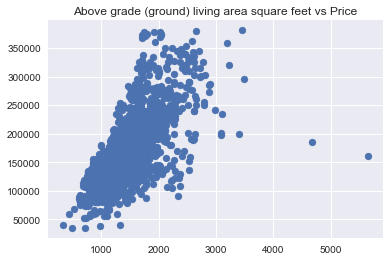

In [90]:
plt.scatter(df_2['GrLivArea'], df_2['SalePrice'])
plt.title('Above grade (ground) living area square feet vs Price')
plt.show()

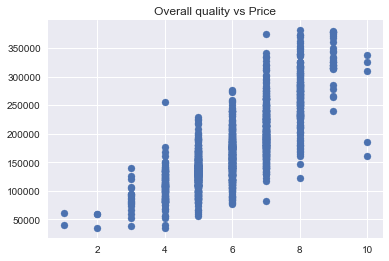

In [91]:
plt.scatter(df_2['OverallQual'], df_2['SalePrice'])
plt.title('Overall quality vs Price')
plt.show()

### For the most value-detracting features, we can compare how the roofing material affects the price versus how the positive off-site features nearby affect the price.  As shown, having(1) clay/tile as roofing material(green) displays a slightly greater difference(price drop) in mean of sale price when compared with the price difference caused by existence(1)/lack(0) of nearby positive features like parks. 

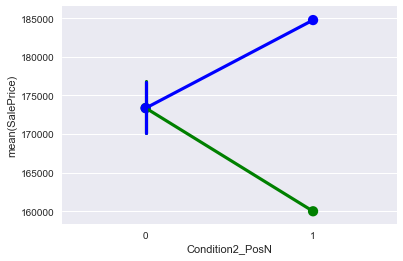

In [92]:
RoofMatl =  sns.pointplot(x='RoofMatl_ClyTile', y="SalePrice", data=df_2_dummies, color="green")
PosN = sns.pointplot(x='Condition2_PosN', y="SalePrice", data=df_2_dummies, color ="blue")


#### (Optional) Case 2: Can you identify any abnormally priced houses?
We might consider these being properties that are over or under predicted by price. Can you make sense of when and why these are over and under predicted?

### Looking at features that affect the price the most to the outliers having too high or too low sale prices provides clues as to when some of these house are over/undervalued.  For example, house 473 has square footage of only 1976 but priced at 440000, which is abnormally high for houses with such square footage.  Similarly,  house 2696 is priced at 383970 which is very low for the area.  We may also look at other predictors such as roofing material used, to see whether other factors are contributing to the abnormal values. 

In [93]:
filter = tukey_mask
ab_price = df[filter]
df_ab = pd.DataFrame(ab_price)
df_ab[['GrLivArea','RoofMatl','SalePrice']].sort_values(['SalePrice'])

,GrLivArea,RoofMatl,SalePrice
112,2696,CompShg,383970
53,1842,WdShngl,385000
825,2084,CompShg,385000
224,2392,CompShg,386250
688,1419,CompShg,392000
1181,1652,CompShg,392500
378,1856,CompShg,394432
1437,1932,CompShg,394617
774,1973,CompShg,395000
987,1940,CompShg,395192


#### (Optional) Case 3:  Which houses are good investments?

Which criteria would you look at?  How sure can you be of your assumptions?  Give precise metrics but also give a concise recommendation that is non-technical that communicates the risks of your anlaysis.

### Given the above analysis, house 112 and house 224 are notable.  They both have high squre footage but low price, while they do not have undesirable features such as clay/tile roofing which tend to negatively affect the price. 

#### (Optional) Case 4:  Which houses are good investments (extended)?
One idea that is common in the real-estate invement community is called "flipping".  This usually entails buying a property with "changable" charactaristics that can be upgraded.  Examples of changable or "upgradable" features include:  A garage, a kitchen, etc.

Can you give us an idea of investments opportunities considering "upgradable" features?  You will have to explore this idea on your own and possibly do a little research for subject matter expertise.

- Some features of a house are worth more than others
- Some features can't be upgraded (ie: square footage)

### Overall Quality of the house material and finish can be upgraded to significantly raise the pricing of houses. 